# Exercises

### 1. Load your zillow dataset.

In [119]:
from wrangle import wrangle_zillow, split_zillow
df_zillow = wrangle_zillow()

df = df_zillow.copy()

train, validate, test = split_zillow(df)

In [2]:
train.shape

(1178202, 7)

In [24]:
train.columns

Index(['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet',
       'taxvaluedollarcnt', 'yearbuilt', 'taxamount', 'fips'],
      dtype='object')

### 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calfulatedfinishedsqft.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [120]:
train = train.rename(columns = {'calculatedfinishedsquarefeet':'square_feet', 'taxvaluedollarcnt': 'house_value'})

In [27]:
train.head()

,bedroomcnt,bathroomcnt,square_feet,house_value,yearbuilt,taxamount,fips
176880,3,2.0,1714,115157,1973,1282.32,6059
331975,3,3.0,1862,345618,1958,5530.82,6059
1753349,5,5.0,3959,1451000,1953,15884.95,6037
120218,3,3.0,2100,459187,1962,5619.06,6037
1991743,4,2.0,1954,403193,1980,5047.67,6037


In [122]:
x_train = train[['square_feet']]
y_train = train[['house_value']]

In [54]:
# set a baseline

baseline = train.house_value.mean()
baseline

398683.7051405447

In [121]:
train['baseline'] = train.house_value.mean()
train.head()

,bedroomcnt,bathroomcnt,square_feet,house_value,yearbuilt,taxamount,fips,baseline
176880,3,2.0,1714,115157,1973,1282.32,6059,398683.705141
331975,3,3.0,1862,345618,1958,5530.82,6059,398683.705141
1753349,5,5.0,3959,1451000,1953,15884.95,6037,398683.705141
120218,3,3.0,2100,459187,1962,5619.06,6037,398683.705141
1991743,4,2.0,1954,403193,1980,5047.67,6037,398683.705141


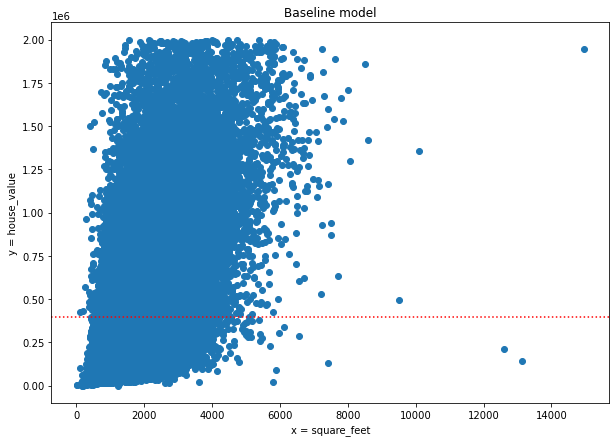

In [123]:
# plot data with baseline:
plt.figure(figsize = (10,7))

plt.scatter(x_train.sample(100000, random_state=123), y_train.sample(100000, random_state=123))
plt.axhline(train.house_value.mean(), ls = ':', color = 'red')
plt.xlabel('x = square_feet')
plt.ylabel('y = house_value')
plt.title('Baseline model');

In [125]:
# Now we fit a regression model using OLS method.
# OLS = ordinary least squares.

# create the model object
lm = LinearRegression(normalize=True)

# fit the model to training data
model = lm.fit(x_train, y_train)

# make prediction
train['yhat'] = lm.predict(x_train)

train.head()

,bedroomcnt,bathroomcnt,square_feet,house_value,yearbuilt,taxamount,fips,baseline,yhat
176880,3,2.0,1714,115157,1973,1282.32,6059,398683.705141,391221.992727
331975,3,3.0,1862,345618,1958,5530.82,6059,398683.705141,404393.422522
1753349,5,5.0,3959,1451000,1953,15884.95,6037,398683.705141,591018.343337
120218,3,3.0,2100,459187,1962,5619.06,6037,398683.705141,425574.505571
1991743,4,2.0,1954,403193,1980,5047.67,6037,398683.705141,412581.068071


house_value = Actual target  
yhat = OLS model prediction

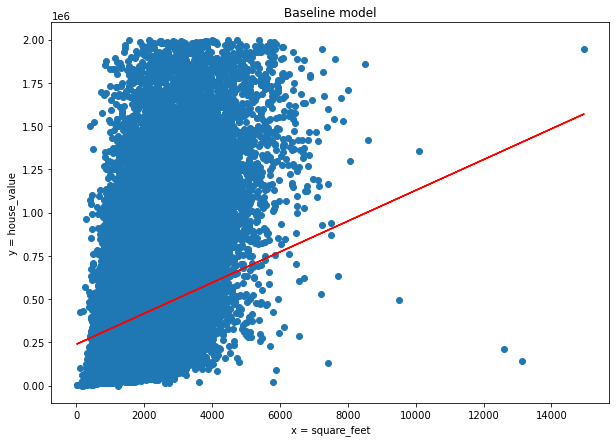

In [106]:
# visualize the line of best fit from OLS linear model
plt.figure(figsize = (10,7))

plt.scatter(x_train.sample(100000, random_state=123), y_train.sample(100000, random_state=123))
plt.plot(train.square_feet.sample(100000, random_state=123), train.yhat.sample(100000, random_state=123), color = 'red')
plt.xlabel('x = square_feet')
plt.ylabel('y = house_value')
plt.title('Baseline model');

### 3. Plot the residuals for the linear regression model that you made.

#### Residuals (error)
    - predicted minus actual

In [126]:
train.head()

,bedroomcnt,bathroomcnt,square_feet,house_value,yearbuilt,taxamount,fips,baseline,yhat
176880,3,2.0,1714,115157,1973,1282.32,6059,398683.705141,391221.992727
331975,3,3.0,1862,345618,1958,5530.82,6059,398683.705141,404393.422522
1753349,5,5.0,3959,1451000,1953,15884.95,6037,398683.705141,591018.343337
120218,3,3.0,2100,459187,1962,5619.06,6037,398683.705141,425574.505571
1991743,4,2.0,1954,403193,1980,5047.67,6037,398683.705141,412581.068071


In [127]:
# residual = actual - predicted

train['residual'] = train.house_value - train.yhat
train['baseline_residual'] = train.house_value - train.baseline

In [61]:
train.head()

,bedroomcnt,bathroomcnt,square_feet,house_value,yearbuilt,taxamount,fips,baseline,yhat,residual,baseline_residual
176880,3,2.0,1714,115157,1973,1282.32,6059,398683.705141,391221.992727,-276064.992727,-2.835267e+05
331975,3,3.0,1862,345618,1958,5530.82,6059,398683.705141,404393.422522,-58775.422522,-5.306571e+04
1753349,5,5.0,3959,1451000,1953,15884.95,6037,398683.705141,591018.343337,859981.656663,1.052316e+06
120218,3,3.0,2100,459187,1962,5619.06,6037,398683.705141,425574.505571,33612.494429,6.050329e+04
1991743,4,2.0,1954,403193,1980,5047.67,6037,398683.705141,412581.068071,-9388.068071,4.509295e+03


In [62]:
train.residual.sum()

-4.480965435504913e-05

In [63]:
train.baseline_residual.sum()

-5.885958671569824e-06

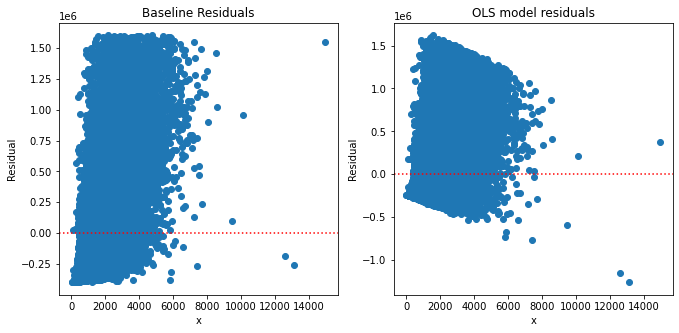

In [128]:
# residual plots (x vs residual)

plt.figure(figsize = (11,5))

plt.subplot(121)
plt.scatter(train.square_feet.sample(100000, random_state=123), train.baseline_residual.sample(100000, random_state=123))
plt.axhline(y = 0, ls = ':', color = 'red')
plt.xlabel('x')
plt.ylabel('Residual')
plt.title('Baseline Residuals')

plt.subplot(122)
plt.scatter(train.square_feet.sample(100000, random_state=123), train.residual.sample(100000, random_state=123))
plt.axhline(y = 0, ls = ':', color = 'red')
plt.xlabel('x')
plt.ylabel('Residual')
plt.title('OLS model residuals');

<AxesSubplot:xlabel='square_feet', ylabel='residual'>

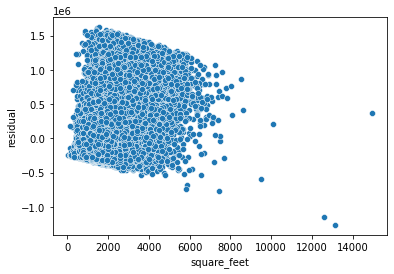

In [105]:
# residual plots (x vs residual)

sns.scatterplot(x="square_feet", y="residual", data=train.sample(100000, random_state=123))

### 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

* SSE (Sum of Squared Errors)  ---   sum the squared of residuals
* ESS  ---  explained sum of squares
* TSS  ---  total sum of squares
* MSE (Mean Squared Error)
* RMSE (Root Mean Squared Error)

In [141]:
SSE = mean_squared_error(train.house_value, train.yhat) * len(train)
ESS = sum((train.yhat - train.house_value.mean())**2)
TSS = ESS + SSE
MSE = mean_squared_error(train.house_value, train.yhat)
RMSE = sqrt(mean_squared_error(train.house_value, train.yhat))

print(f"SSE = {SSE}")
print(f"TSS = {TSS}")
print(f"MSE = {MSE}")
print(f"RMSE = {RMSE}")

SSE = 1.0066504359522392e+17
TSS = 1.1587975206566512e+17
MSE = 85439545676.56813
RMSE = 292300.4373526802


### 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

In [147]:
SSE_bs = mean_squared_error(train.house_value, train.baseline) * len(train)
MSE_bs = mean_squared_error(train.house_value, train.baseline)
RMSE_bs = sqrt(mean_squared_error(train.house_value, train.baseline))

print(f"SSE = {SSE}")
print(f"MSE = {MSE}")
print(f"RMSE = {RMSE}")

SSE = 1.0066504359522392e+17
MSE = 85439545676.56813
RMSE = 292300.4373526802


In [175]:
RMSE < RMSE_bs

True

### 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [140]:
if SSE < SSE_bs:
    print('Our model is better than the baseline.')
else:
    print('Baseline is better than our model.')

Our model is better than the baseline.


### 7. What is the amount of variance explained in your model?

In [168]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

evs = explained_variance_score(train.house_value, train.yhat)
print('Explained Variance = ', round(evs,3))

Explained Variance =  0.131


In [169]:
from sklearn.metrics import r2_score
r2_score(train.house_value, train.yhat)

0.13129738542942293

### 8. Is your model better than the baseline model?

In [174]:
R2 = ESS/TSS
print('R-squared = ',round(R2,3))
print("Percent of variance in y explained by x = ", round(R2*100,1), "%")

R-squared =  0.131
Percent of variance in y explained by x =  13.1 %


In [176]:
if RMSE < RMSE_bs:
    print('Our model is better than the baseline.')
else:
    print('Baseline is better than our model.')

Our model is better than the baseline.


### 9. Create a file named evaluate.py that contains the following functions.

* plot_residuals(y, yhat): creates a residual plot
* regression_errors(y, yhat): returns the following values:
    * sum of squared errors (SSE)
    * explained sum of squares (ESS)
    * total sum of squares (TSS)
    * mean squared error (MSE)
    * root mean squared error (RMSE)
* baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
* better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false


In [113]:
def plot_residuals(x, y, yhat):
    plt.scatter(x.sample(100000, random_state=123), (y-yhat).sample(100000, random_state=123))
    plt.axhline(y = 0, ls = ':', color = 'red')
    plt.xlabel('x')
    plt.ylabel('Residual')
    plt.title('OLS model residuals');

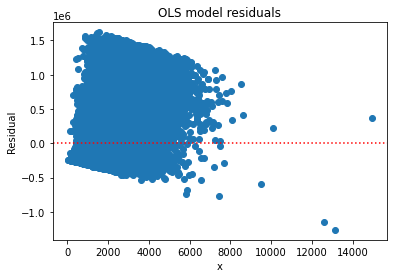

In [114]:
plot_residuals(train.square_feet, train.house_value, train.yhat)

In [181]:
def regression_errors(y, yhat):
    
    SSE = mean_squared_error(y, yhat) * len(train)
    ESS = sum((yhat - y.mean())**2)
    TSS = ESS + SSE
    MSE = mean_squared_error(y, yhat)
    RMSE = sqrt(mean_squared_error(y, yhat))
    
    ss = pd.DataFrame(np.array(["SSE", "ESS", "TSS", "MSE", "RMSE"]), columns=["metric"])
    ss['model_results'] = np.array([SSE, ESS, TSS, MSE, RMSE])
    
    return ss

In [183]:
regression_errors(train.house_value, train.yhat)

,metric,model_results
0,SSE,1.006650e+17
1,ESS,1.521471e+16
2,TSS,1.158798e+17
3,MSE,8.543955e+10
4,RMSE,2.923004e+05


In [182]:
def baseline_mean_errors(y, baseline):
    
    SSE_bs = mean_squared_error(y, baseline) * len(y)
    MSE_bs = mean_squared_error(y, baseline)
    RMSE_bs = sqrt(mean_squared_error(y, baseline))
    
    ss_bs = pd.DataFrame(np.array(["SSE_bs", "MSE_bs", "RMSE_bs"]), columns=["metric"])
    ss_bs['model_results'] = np.array([SSE_bs, MSE_bs, RMSE_bs])
    
    return ss_bs

In [184]:
baseline_mean_errors(train.house_value, train.baseline)

,metric,model_results
0,SSE_bs,1.158798e+17
1,MSE_bs,9.835304e+10
2,RMSE_bs,3.136129e+05


In [179]:
def better_than_baseline(y, yhat,baseline):
    RMSE = sqrt(mean_squared_error(y, yhat))
    RMSE_bs = sqrt(mean_squared_error(y, baseline))
    
    if RMSE < RMSE_bs:
        return True
    else:
        return False

In [180]:
better_than_baseline(train.house_value, train.yhat, train.baseline)

True